> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigation of TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

I have chosen "TMDb Movie Data" from the following URL, as given:
https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf

As Part of the project, I have done the following:

1. Downloaded "tmdb-movies.csv" file from the following location, as given:
https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv

2. I have uploaded the csv file at the working directory for the jupiter.

While analyzing the data set, I would look for answers for the following questions:
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with films that have high revenues?

In [13]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

Just as a note:
We have used 3 csv files in our project, as the following:
First one, named "tmdb-movies.csv" - contains original data from the external site
Second one, named "filtered-movies.csv" - contains movie data after cleaning
Third one, named "movies_final.csv" - used to answer the first question
Reason for creating these many csv files, is to make sure I don't need to run the entire earlier step, if 
jupiter kernel has any issue

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [3]:
# Loading data from csv file uploaded at the jupiter working directory
df_tmdb = pd.read_csv('tmdb-movies.csv')

In [4]:
df_tmdb.shape

# No. of rows in the data set: 10866
# No. of columns in the data set: 21

(10866, 21)

In [5]:
# Displaying top 3 rows
df_tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Few Initial Observations:
1. Default comma separator has worked as I can see the data is distrubuted across multiple columns.
2. "Read_csv" correctly identified the headers and put them into the column names.

In [6]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Few Observations:
Please note, we have, in total, 10866 rows in the set.
1. "cast" column has only 10790 not null values, so it has (10866 - 10790) = 76 null values
2. Similarly, "homepage" has (10866 - 2936) = 7930 null values
3. "director" column has (10866 - 10822) = 44 null values
4. "tagline" column has (10866 - 8042) = 2824 null values
5. "keywords" column has (10866 - 9373) = 1493 null values
6. "overview" has (10866 - 10862) = 4 null values
7. "genres" column has (10866 - 10843) = 23 null values
8. "production_companies" column has (10866 - 9836) = 1030 null values

In [7]:
# So, from the list above, it is obvious that, 11 columns have object data type
# Let's take one of the important columns: release_date
df_tmdb['release_date'].value_counts()

# The column does not contain null and always have date, so we would change it's data type at the cleaning section

1/1/09      28
1/1/08      21
1/1/07      18
1/1/05      16
10/10/14    15
1/1/03      13
9/7/12      13
1/1/06      13
1/1/12      12
10/14/11    12
10/16/15    12
10/17/14    11
9/6/13      11
8/22/14     11
10/11/13    11
8/14/15     10
9/5/14      10
4/27/07     10
9/9/11      10
1/1/04      10
9/11/15     10
9/30/11      9
10/12/12     9
9/19/14      9
1/1/10       9
2/8/08       9
9/12/14      9
9/14/07      9
12/1/06      8
4/4/14       8
            ..
10/26/65     1
11/19/10     1
5/19/02      1
12/19/72     1
7/28/05      1
10/23/01     1
6/5/03       1
6/17/08      1
6/14/05      1
10/17/90     1
5/21/04      1
8/13/97      1
3/23/01      1
2/15/72      1
1/18/77      1
6/29/94      1
1/16/66      1
1/31/80      1
11/16/95     1
2/14/04      1
12/18/86     1
11/14/79     1
8/26/89      1
7/20/14      1
7/31/87      1
2/14/03      1
9/21/05      1
9/19/74      1
5/19/09      1
5/5/00       1
Name: release_date, Length: 5909, dtype: int64

In [8]:
# Let's take another important column, genres, please note, as we saw earlier, in 23 cases, it has null values
# Let's see the corresponding records
df_tmdb[df_tmdb['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


Few observations from the rows returned:
1. Most of the cases where genres is null, budget, revenue, budget_adj, revenue_adj columns are having zeroes
2. Looks like, we can drop these rows at the cleaning section

In [9]:
# Taking it forward, let's check all those rows where budget, revenue, budget_adj and revenue_adj columns are having zeroes
df_tmdb[(df_tmdb['budget'] == 0) & (df_tmdb['revenue'] == 0) & (df_tmdb['budget_adj'] == 0) & (df_tmdb['revenue_adj'] == 0) ]

# We would look at these rows at cleaning section, these rows might also need to be removed

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.0,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.0,0.0
122,277355,tt1945084,1.342839,0,0,Everly,Salma Hayek|Hiroyuki Watanabe|Jennifer Blanc|T...,NaN,Joe Lynch,Enter if you dare.,...,"After she betrays a powerful mob boss, a woman...",90,Thriller|Action,Crime Scene Pictures|Radius-TWC|Anonymous Cont...,1/23/15,169,5.1,2015,0.0,0.0
140,300803,tt3829170,1.144808,0,0,Dragonheart 3: The Sorcerer's Curse,Julian Morris|Tamzin Merchant|Jassa Ahluwalia|...,NaN,Colin Teague,NaN,...,When aspiring knight Gareth goes in search of ...,97,Action|Adventure|Fantasy,Raffaella Productions,2/24/15,59,4.5,2015,0.0,0.0
143,378373,tt3532278,1.128081,0,0,Brothers of the Wind,Manuel Camacho|Jean Reno|Tobias Moretti|Eva Kuen,http://www.terramater.at/cinema/brothers-of-th...,Gerado Olivares|Otmar Penker,Sometimes a friendship sets you free,...,The way of the eagle is to raise two chicks. T...,98,Adventure|Drama|Family,Terra Mater Factual Studios,12/24/15,11,7.5,2015,0.0,0.0


In [10]:
# Another way of looking at the data
# We are checking the rows where the runtime equals zero
# Most of the rows look to be insignificant as most of the cases, columns like budget, revenue, budget_adj, revenue_adj columns
# are zero
df_tmdb[(df_tmdb['runtime'] == 0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


In [11]:
# Let's check for duplicate rows in the set

# Looks like we have one duplicate rows, this has to be dropped as well, at the cleaning section
df_tmdb[(df_tmdb.duplicated())]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
# Since the question asks about genres, let's see its' values
df_tmdb['genres'].value_counts()

Drama                                                712
Comedy                                               712
Documentary                                          312
Drama|Romance                                        289
Comedy|Drama                                         280
Comedy|Romance                                       268
Horror|Thriller                                      259
Horror                                               253
Comedy|Drama|Romance                                 222
Drama|Thriller                                       138
Comedy|Family                                        102
Action|Thriller                                      101
Thriller                                              93
Drama|Comedy                                          92
Animation|Family                                      90
Crime|Drama|Thriller                                  81
Crime|Drama                                           74
Comedy|Horror                  

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [14]:
# Let's change the release_date column data type to date
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
df_tmdb.info()

# From the result-set, we can see that the data type has changed to date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

In [15]:
# Now, let's delete the duplicate row and check the result

df_tmdb.drop_duplicates(inplace = True)
df_tmdb[df_tmdb.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [16]:
# Now, dropping whereever budget and revenue columns are null/zero
# as these rows would be insignificant while picking up the high revenuw films
df_tmdb.drop(df_tmdb[(df_tmdb['budget'] == 0) & (df_tmdb['revenue'] == 0) 
              & (df_tmdb['budget_adj'] == 0) & (df_tmdb['revenue_adj'] == 0)].index, inplace = True)

df_tmdb[(df_tmdb['budget'] == 0) & (df_tmdb['revenue'] == 0) & (df_tmdb['budget_adj'] == 0) & (df_tmdb['revenue_adj'] == 0) ]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [17]:
# Now, let's save the result set into a csv file, so that we won't be required to run the above queries
# in case of disconnection
df_tmdb.to_csv('filtered-movies.csv', index=False)

In [14]:
# filtered data frame
df = pd.read_csv('filtered-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year?)

In [3]:
# Let's see what are the columns in our set
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
# Univariate Data Analysis
df['popularity'].describe()

count    6164.000000
mean        0.909417
std         1.240855
min         0.001117
25%         0.322289
50%         0.570484
75%         1.050621
max        32.985763
Name: popularity, dtype: float64

In [9]:
df['vote_count'].describe()

count    6164.000000
mean      355.941110
std       733.220129
min        10.000000
25%        31.000000
50%        95.500000
75%       324.000000
max      9767.000000
Name: vote_count, dtype: float64

In [10]:
df['budget'].describe()

count    6.164000e+03
mean     2.577756e+07
std      3.737812e+07
min      0.000000e+00
25%      1.700000e+06
50%      1.200000e+07
75%      3.300000e+07
max      4.250000e+08
Name: budget, dtype: float64

We note that popularity & vote_count varies quite significantly than budget.
Mean for popularity is 0.90 while the max is 32.9. Similarly for vote_count, mean is 355.9 while max is 9767.
We would now be checking the cases where popularity & vote_count, both are higher

In [17]:
df.query('popularity > 1.05')['id'].count()

1542

In [18]:
df.query('vote_count > 324')['id'].count()

1540

In [19]:
df.query('popularity > 1.05 & vote_count > 324')['id'].count()

1232

In [20]:
df.query('popularity > 1.05 & vote_count < 324')['id'].count()

309

So, from the data above, it is obvious that, in most cases popularity and vote_count are going side by side whenever
they are sufficiently larger than mean. So, we are keeping only one of these two at our set, to analyze and answer the first
question. 

Nevertheless, a more specialized question could be, should we consider the data where the vote_count is lower than mean but the
popularity is enormous ? Obviously the film is very popular at a small subset of our population. Thoough its not asked at the
question, but this would be an interesting portion of the data to study.

In [25]:
df['original_title'].value_counts()

Hercules                                         3
The Manchurian Candidate                         2
The Sentinel                                     2
Max                                              2
Get Carter                                       2
Beowulf                                          2
Halloween II                                     2
Neighbors                                        2
Assault on Precinct 13                           2
Project X                                        2
Fantastic Four                                   2
The Omen                                         2
Doctor Dolittle                                  2
Joan of Arc                                      2
The Black Hole                                   2
The Great Gatsby                                 2
Batman                                           2
Carrie                                           2
The Guardian                                     2
The Amityville Horror          

From our understanding, 'original_title' is not unique ? Let's check with one such data.

In [29]:
df.query('original_title == "Hercules"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
322,184315,tt1267297,2.549403,100000000,243400000,Hercules,Dwayne Johnson|Ian McShane|John Hurt|Rufus Sew...,NaN,Brett Ratner,"Before he was a legend, he was a man.",...,"Fourteen hundred years ago, a tormented soul w...",99,Action|Adventure,Paramount Pictures|Metro-Goldwyn-Mayer (MGM)|R...,2014-07-23,1215,5.6,2014,9.210911e+07,2.241936e+08
2801,11970,tt0119282,3.488910,85000000,252712101,Hercules,Tate Donovan|Josh Keaton|Roger Bart|Danny DeVi...,NaN,John Musker|Ron Clements,Zero to Hero!,...,"Bestowed with superhuman strength, a young mor...",93,Animation|Family|Fantasy|Adventure|Comedy,Walt Disney Pictures,1997-06-26,909,7.0,1997,1.154691e+08,3.432994e+08
4503,26452,tt0085672,0.095316,0,10676194,Hercules,Lou Ferrigno|Sybil Danning|Brad Harris|Bobby R...,NaN,Luigi Cozzi,The Legend Lives!,...,The film is an odd retelling of the story of H...,98,Action|Fantasy,Golan-Globus Productions|Cannon Italia Srl,1983-08-12,10,3.1,1983,0.000000e+00,2.337352e+07


From the data, it seems like, the data is different. Three different films were released with the title as "Hercules"
in different years, by different directors, and with a different tagline. So, the data looks to be ok to me.

In [20]:
# I would keep, id, release-year, popularity & genres
# Other than that, I would drop columns
df.drop(['imdb_id', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'budget_adj',
       'revenue_adj'], axis = 1, inplace = True)
df.columns

Index(['id', 'popularity', 'genres', 'release_year'], dtype='object')

In [21]:
# Let's see the data frame now
df.head(3)

,id,popularity,genres,release_year
0,135397,32.985763,Action|Adventure|Science Fiction|Thriller,2015
1,76341,28.419936,Action|Adventure|Science Fiction|Thriller,2015
2,262500,13.112507,Adventure|Science Fiction|Thriller,2015


In [22]:
df.shape

(6164, 4)

In [23]:
# Since this would be used to answer questions and possibly plotting graph
# so, let's remove any null values
df.dropna(how='any', axis=0, inplace = True)
df.shape

# 1 row got removed

(6163, 4)

In [24]:
# Let's see the values present at genres column
df['genres'].value_counts()

Drama                                                  403
Comedy                                                 360
Drama|Romance                                          190
Comedy|Romance                                         171
Comedy|Drama                                           154
Comedy|Drama|Romance                                   151
Horror|Thriller                                        151
Horror                                                 114
Drama|Thriller                                          85
Documentary                                             70
Action|Thriller                                         70
Drama|Comedy                                            60
Comedy|Family                                           56
Crime|Drama|Thriller                                    53
Crime|Drama                                             45
Thriller                                                44
Action|Crime|Thriller                                   

In [25]:
# Since genres column contains '|' separated values, so I am spliting the values into a new dataframe in stacked manner
# Later I am joining into the origical

df_stacked = pd.DataFrame(df['genres'].str.split('|').tolist(), index=df.id).stack()
df_stacked = df_stacked.reset_index([0, 'id'])
df_stacked.columns = ['id', 'genres']
df_stacked.head(3)

df = df.join(df_stacked, lsuffix='_caller', rsuffix='_other').loc[:,['id_other', 'popularity', 'genres_other', 'release_year']]
df.rename(columns={'id_other': 'id', 'genres_other': 'genres'}, inplace=True)
df.head()

,id,popularity,genres,release_year
0,135397,32.985763,Action,2015
1,135397,28.419936,Adventure,2015
2,135397,13.112507,Science Fiction,2015
3,135397,11.173104,Thriller,2015
4,76341,9.335014,Action,2015


In [26]:
# Let's again save it to a file
df.to_csv('movies_final', index = False)

In [27]:
# Read the final csv
df = pd.read_csv('movies_final')
df.shape

(6163, 4)

In [28]:
# Modifying the data frame to keep only mean value per genre and release-year
df = df.groupby(['release_year', 'genres'])['popularity'].mean().reset_index()

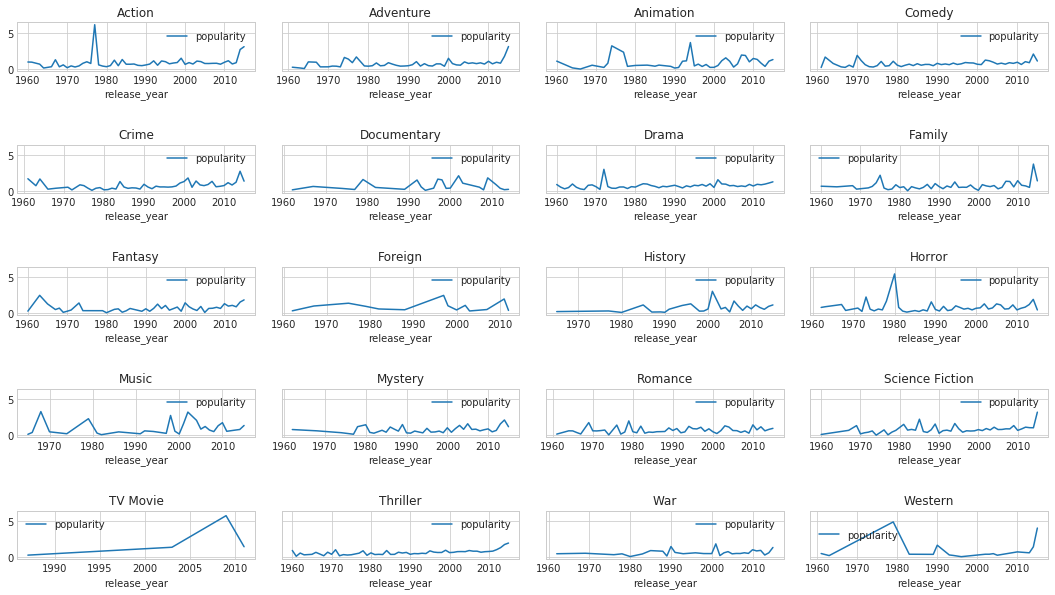

In [29]:
# Now plotting the mean data per genre and release-year
def comparisonGraph(df, groupbyCol, noOfCols, fsize, horSpace, xAxisName, yAxisName):
    grouped = df.groupby(groupbyCol)
    ncols=noOfCols
    nrows = int(np.ceil(grouped.ngroups/ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=fsize, sharey=True)
    fig.tight_layout()
    plt.subplots_adjust(hspace = horSpace)

    for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
        grouped.get_group(key).plot(x=xAxisName, y=yAxisName, ax=ax)
        ax.set_title(key)
    return   

comparisonGraph(df, 'genres', 4, (15, 8), 1.5, 'release_year', 'popularity')

Which genres are most popular from year to year ?
From the graphs, action, adventure and thriller types of genres look to steadily popular across years.
Their popularities never really gone down over the years.
Science fiction genre also follows the same while there was a stiff decrease in its popularity
around the 1980s.

Although the graphs depict quite nicely, but we haven't considered one aspect of the data set and its behavior in our analysis.
That is, when a very small sub set of the population gives a high rating, does this signify the actual popularity of
the film ? This is not necessarily covered in the question, but this smaller sample population can have a higher impact
on the graphs.
We are assuming, if a genre is steadily popular in a huge range of years, we might be negating the effect.

### Research Question 2  (What kinds of properties are associated with films that have high revenues ?!)

In [30]:
# Now, we have the next question as the following:
# What kinds of properties are associated with films that have high revenues?
df = pd.read_csv('filtered-movies.csv')
df.shape

(6164, 21)

In [31]:
# Re-notting down the columns of data frame
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [32]:
# We won't need the rows where revenuw or revenue_adj is empty
df = df[(df['revenue'].notnull()) & (df['revenue_adj'].notnull())]
df.shape

# So, we don't have null values in either of the columns

(6164, 21)

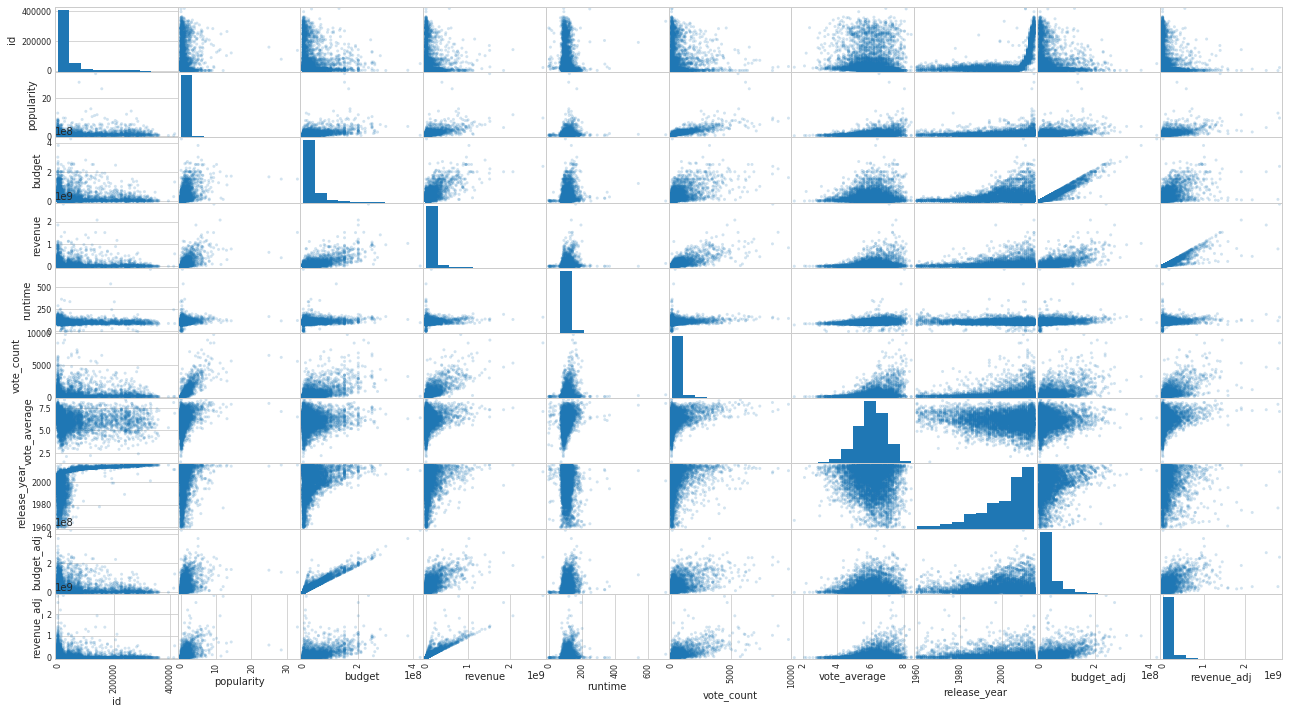

In [33]:
# Now, I am going to use scatter_matrix to see the corelation of these two columns, with other columns
pd.plotting.scatter_matrix(df, alpha = 0.2, figsize = (22, 12));

As we can see, budget & revenue look to be positively correlated
Vote_count has more positive correlation with revenue than popularity with revenue.

So, we can safely say, from the data, we can see that, there are more vote_counts and budget associated with films
that have earned bigger revenues. vote_average also have lesser positive co-relation with the revenue.

So, it looks like, whoever had more budgets for their films and did more publicity amongst viewers,
they have seen higher revenues.

We can see another important aspect from the data. Vote_count has significantly increased over years. Now, if vote_count has a
lot to do in increasing the revenue, then for those films that were released a long ago, what contributed for their higher
revenues ? We may not have additional attributes for those films, but this would be an interesting study. These sample set 
of population might behave differently than our analysis but this might be beyond the scope of the data presented.

On the other hand, we didn't have much duplicated rows, so we assume that it didn't play a huge enough role in our analysis
as well.

In [34]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [35]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0